In [ ]:
import os
import zipfile
import cv2
import numpy as np
ZIP_FILE = "/content/audio_languages.zip"
EXTRACT_PATH = "audio_dataset"

with zipfile.ZipFile(ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

dataset_path = "/content/audio_dataset/Indian_Languages_Audio_Dataset"
labels = os.listdir(dataset_path)
print(labels)

['Telugu', 'Bengali', 'Tamil', 'Kannada', 'Punjabi', 'Malayalam', 'Hindi']


feature and target

In [ ]:
def extract_features(file_path, max_len=100):
    audio, sr = librosa.load(file_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]

    return mfcc.T

In [ ]:
X = []
y = []

for label in labels:
    folder = os.path.join(dataset_path, label)
    for file in os.listdir(folder):
        if file.endswith(".mp3") or file.endswith(".wav"):
            features = extract_features(os.path.join(folder, file))
            if features.shape == (100, 13):
                X.append(features)
                y.append(label)


In [ ]:
X = np.array(X)
y = np.array(y)

print(X.shape)  # Check this prints (N, 100, 13)


(7000, 100, 13)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_new = to_categorical(y_encoded)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)


model training

lstm

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(labels), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_3 (Masking)             │ (None, 100, 13)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,415 (318.03 KB)

 Trainable params: 81,415 (318.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 31s 156ms/step - accuracy: 0.3140 - loss: 1.7809 - val_accuracy: 0.6893 - val_loss: 1.0469
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 148ms/step - accuracy: 0.6092 - loss: 1.1123 - val_accuracy: 0.7921 - val_loss: 0.7171
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 41s 149ms/step - accuracy: 0.7070 - loss: 0.8594 - val_accuracy: 0.8171 - val_loss: 0.6145
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 41s 149ms/step - accuracy: 0.7470 - loss: 0.7519 - val_accuracy: 0.8471 - val_loss: 0.4986
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - accuracy: 0.7921 - loss: 0.6160 - val_accuracy: 0.8657 - val_loss: 0.4163
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 152ms/step - accuracy: 0.8273 - loss: 0.5187 - val_accuracy: 0.8921 - val_loss: 0.3643
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 148ms/step - accuracy: 0.8462 - loss: 0.4740 - val_accuracy: 0.8950 - val_loss: 0.3467
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 41s 149ms/step - accuracy: 0.8681 - loss: 0

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


In [ ]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

if y_test.ndim == 2 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

     Bengali       0.89      0.92      0.91       224
       Hindi       0.84      0.94      0.88       186
     Kannada       0.97      0.89      0.93       215
   Malayalam       0.96      0.92      0.94       211
     Punjabi       0.89      0.97      0.92       183
       Tamil       0.95      0.90      0.93       178
      Telugu       0.88      0.84      0.86       203

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400



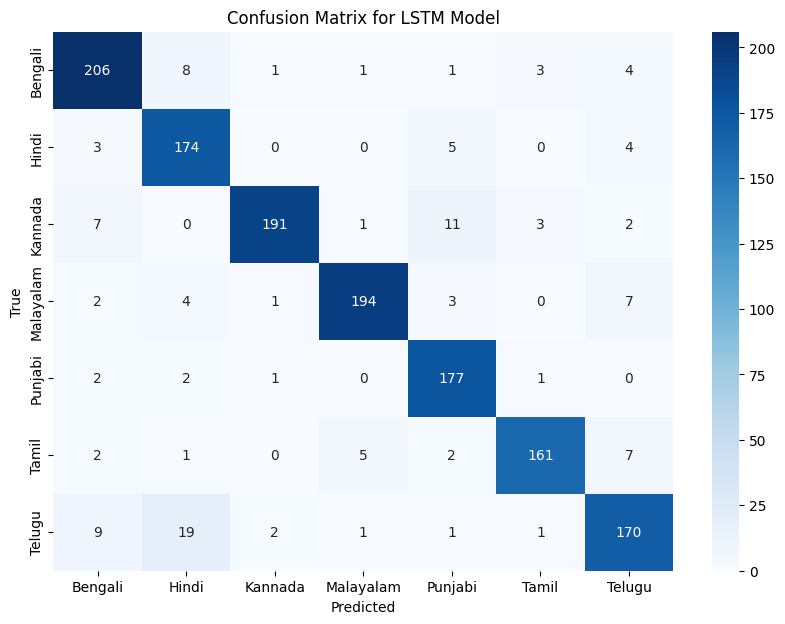

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

if y_test.ndim == 2 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for LSTM Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np

test_accuracy = history.history['val_accuracy'][-1]
expected_accuracy = 0.2
accuracies = history.history['val_accuracy']
t_stat, p_value_ttest = ttest_1samp(accuracies, expected_accuracy)

print(f"T-statistic: {t_stat}")
print(f"P-value (T-Test): {p_value_ttest}")

T-statistic: 29.79914286297416
P-value (T-Test): 2.6370559834455445e-10


In [ ]:
from scipy.stats import norm
test_accuracy = history.history['val_accuracy'][-1]
expected_accuracy = 0.2
accuracies = history.history['val_accuracy']
std_dev = np.std(accuracies)

z_score = (test_accuracy - expected_accuracy) / (std_dev / np.sqrt(len(accuracies)))
print("Z-score:", z_score)
p_value = norm.sf(abs(z_score)) * 2
print("P-value:", p_value)

Z-score: 34.23087998670484
P-value: 8.398267592510873e-257


In [61]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
